# Current Values for All States from COVID Tracking Project API

--The most recent COVID data for every state. The current value may be different than today.



In [36]:
import requests
from random import uniform 
from pprint import pprint
import pandas as pd
import numpy as np
import os

from config import api_key
from census import Census
import matplotlib.pyplot as plt

# Save config information.
url = "https://api.covidtracking.com/v1/states/current.json"

covid_json = requests.get(url).json()

#PPrint the first state in list to evaluate list items
#Field description for variables can be found here : https://covidtracking.com/data/api 
pprint(covid_json[0])

{'checkTimeEt': '09/17 23:59',
 'commercialScore': 0,
 'dataQualityGrade': 'A',
 'date': 20200918,
 'dateChecked': '2020-09-18T03:59:00Z',
 'dateModified': '2020-09-18T03:59:00Z',
 'death': 45,
 'deathConfirmed': 45,
 'deathIncrease': 1,
 'deathProbable': None,
 'fips': '02',
 'grade': '',
 'hash': 'cc5fc47f4be842f963af84b7fcd10209b229c2b9',
 'hospitalized': None,
 'hospitalizedCumulative': None,
 'hospitalizedCurrently': 36,
 'hospitalizedIncrease': 0,
 'inIcuCumulative': None,
 'inIcuCurrently': None,
 'lastUpdateEt': '9/18/2020 03:59',
 'negative': 410706,
 'negativeIncrease': 2314,
 'negativeRegularScore': 0,
 'negativeScore': 0,
 'negativeTestsAntibody': None,
 'negativeTestsPeopleAntibody': None,
 'negativeTestsViral': 411148,
 'onVentilatorCumulative': None,
 'onVentilatorCurrently': 13,
 'pending': None,
 'posNeg': 418293,
 'positive': 7587,
 'positiveCasesViral': 7587,
 'positiveIncrease': 116,
 'positiveScore': 0,
 'positiveTestsAntibody': None,
 'positiveTestsAntigen': None,

In [37]:
states= []
deaths= []
hospitalized = []
covid_positives = []
dates = []
fips_list=[]

indices = list( range(len(covid_json)))

for i in indices:
    states.append(covid_json[i]['state'])
    fips_list.append(covid_json[i]['fips'])
    dates.append(covid_json[i]['date'])
    deaths.append(covid_json[i]['death'])
    hospitalized.append(covid_json[i]['hospitalizedCumulative'])
    covid_positives.append(covid_json[i]['positive'])
    

    



In [38]:
AllStates_dict = {
    "States": states,
    "FIPS": fips_list,
    "Date": dates,
    "Covid Positive": covid_positives,
    "Cumaltive Hospitalized": hospitalized,
    "Deaths": deaths
}
AllStates_df = pd.DataFrame(AllStates_dict)
AllStates_df

,States,FIPS,Date,Covid Positive,Cumaltive Hospitalized,Deaths
0,AK,02,20200918,7587,NaN,45
1,AL,01,20200918,142863,16227.0,2428
2,AR,05,20200918,74082,4896.0,1173
3,AS,60,20200918,0,NaN,0
4,AZ,04,20200918,212942,21865.0,5451
5,CA,06,20200918,769831,NaN,14812
6,CO,08,20200918,63145,7327.0,1911
7,CT,09,20200918,55527,11447.0,4492
8,DC,11,20200918,14852,NaN,619
9,DE,10,20200918,19366,NaN,620


In [39]:
# provide the api key and the year to establish a session
c = Census(api_key, year=2018)

# Set an option to allow up to 300 characters to print in each column
pd.set_option('max_colwidth', 300)

tables = c.acs5.tables()

# The tables variable contains a list of dicts, so we can convert directly to a dataframe
table_df = pd.DataFrame(tables)
table_id = 'B01003'   

# Capture the variables URL from the table_df
url = table_df.loc[table_df['name']==table_id, 'variables'].values[0]

# Make the API call
response = requests.get(url).json()

# convert the response to a DataFrame
variables = pd.DataFrame(response['variables']).transpose()

print(f"Number of available variables: {len(variables)}")

table_info = variables[(variables['predicateType']=='int') & (variables['label'].str.contains("Estimate"))]   


table_columns = ""
for ind in table_info.index:       
    table_columns = table_columns + f"{ind},"
    
    
column_list = table_columns[:-1]
census_data = c.acs5.get(("NAME", column_list), 
                          {'for': 'state:*'})

for i in range(len(table_info)) : 
    for d in census_data:
        d[table_info.iloc[i, 0]] = d.pop(table_info.index[i]) 
    

census_TotalPop_df = pd.DataFrame(census_data)

Number of available variables: 4


In [40]:
AllStates_df['State Pop']= ""
AllStates_df['Covid Positive Per Capita']= ""
AllStates_df['Covid Deaths Per Capita']= ""
AllStates_df

AllState_combined_df = pd.merge(AllStates_df, census_TotalPop_df, how='left', left_on = 'FIPS', right_on = 'state')
AllState_combined_df['State Pop'] = AllState_combined_df['Estimate!!Total']
AllState_combined_df['Covid Positive Per Capita'] = AllState_combined_df['Covid Positive'] / AllState_combined_df['State Pop'] 
AllState_combined_df['Covid Deaths Per Capita'] = AllState_combined_df['Deaths'] / AllState_combined_df['State Pop']
AllState_combined_dropC = AllState_combined_df.drop(columns=['Cumaltive Hospitalized', 'state','Estimate!!Total'])

#drop rows
AllState_combined_clean = AllState_combined_dropC.dropna(axis=0, how='any')

AllState_combined_clean

,States,FIPS,Date,Covid Positive,Deaths,State Pop,Covid Positive Per Capita,Covid Deaths Per Capita,NAME
0,AK,02,20200918,7587,45,738516.0,0.010273,0.000061,Alaska
1,AL,01,20200918,142863,2428,4864680.0,0.029367,0.000499,Alabama
2,AR,05,20200918,74082,1173,2990671.0,0.024771,0.000392,Arkansas
4,AZ,04,20200918,212942,5451,6946685.0,0.030654,0.000785,Arizona
5,CA,06,20200918,769831,14812,39148760.0,0.019664,0.000378,California
6,CO,08,20200918,63145,1911,5531141.0,0.011416,0.000345,Colorado
7,CT,09,20200918,55527,4492,3581504.0,0.015504,0.001254,Connecticut
8,DC,11,20200918,14852,619,684498.0,0.021698,0.000904,District of Columbia
9,DE,10,20200918,19366,620,949495.0,0.020396,0.000653,Delaware
10,FL,12,20200918,677660,13387,20598139.0,0.032899,0.000650,Florida


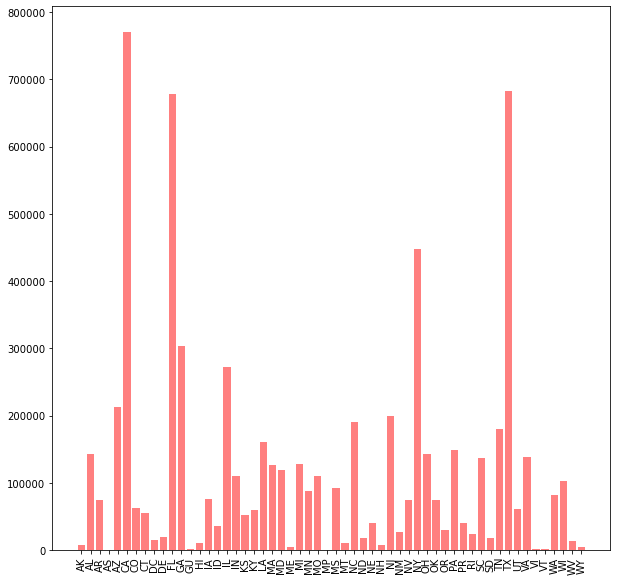

In [43]:

# import matplotlib.pyplot as plt

x_axis = np.arange(len(AllStates_df))

plt.figure(figsize=(10,10))
plt.bar(x_axis, AllStates_df["Covid Positive"], color='r', alpha=0.5)
x = plt.xticks(x_axis, AllStates_df["States"], rotation="vertical")


# Are there states that are outliers for COVID19 Infections?

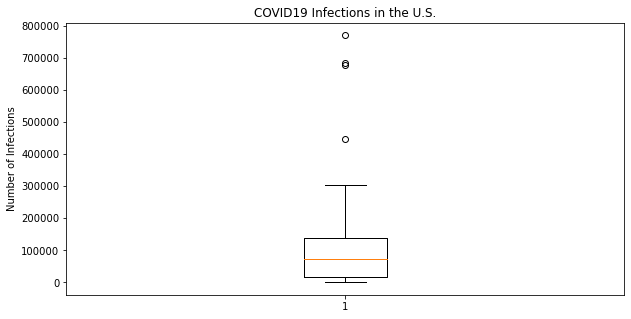

In [44]:
covid19_infxn = AllStates_df['Covid Positive']

plt.figure(figsize=(10,5))
plt.title('COVID19 Infections in the U.S.')
plt.ylabel('Number of Infections')
plt.boxplot(covid19_infxn)
plt.show()


In [45]:
quantiles = covid19_infxn.quantile([.25,.5,.75])
quantiles

0.25     17863.75
0.50     74324.50
0.75    139675.50
Name: Covid Positive, dtype: float64

In [46]:
Q1 = quantiles[0.25]
Q3 = quantiles[0.75]
iqr = Q3 - Q1

print(f"The lower quartile of COVID19 Infections is: {Q1}")
print(f"The upper quartile of COVID19 Infections is: {Q3}")
print(f"The interquartile range of COVID19 Infections is: {iqr}")
print(f"The the median of COVID19 Infections is: {quantiles[0.5]} ")


The lower quartile of COVID19 Infections is: 17863.75
The upper quartile of COVID19 Infections is: 139675.5
The interquartile range of COVID19 Infections is: 121811.75
The the median of COVID19 Infections is: 74324.5 


In [47]:
lower_bound = Q1 - (1.5*iqr)
upper_bound = Q3 + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below -164853.875 could be outliers.
Values above 322393.125 could be outliers.


In [48]:
outliers = AllStates_df.loc[(AllStates_df['Covid Positive'] < lower_bound) | (AllStates_df['Covid Positive'] > upper_bound)]
outliers

,States,FIPS,Date,Covid Positive,Cumaltive Hospitalized,Deaths,State Pop,Covid Positive Per Capita,Covid Deaths Per Capita
5,CA,06,20200918,769831,NaN,14812,,,
10,FL,12,20200918,677660,42715.0,13387,,,
37,NY,36,20200918,448052,89995.0,25423,,,
47,TX,48,20200918,682241,NaN,14713,,,


In [49]:
print("These states are outliers in USA for COVID19 Infections:")
print(outliers['States'])

These states are outliers in USA for COVID19 Infections:
5     CA
10    FL
37    NY
47    TX
Name: States, dtype: object


# Are there states that are outliers for COVID19 deaths?

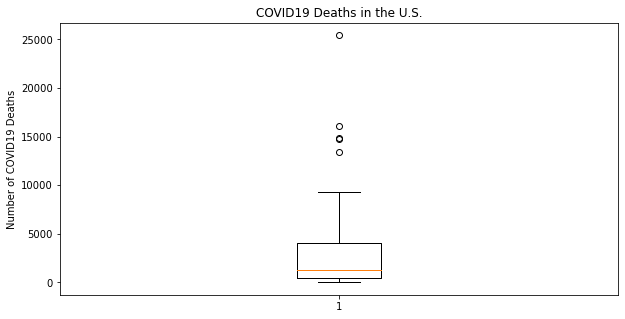

In [50]:

covid_deaths = AllStates_df['Deaths']


plt.figure(figsize=(10,5))
plt.title('COVID19 Deaths in the U.S.')
plt.ylabel('Number of COVID19 Deaths')
plt.boxplot(covid_deaths)
plt.show()

In [51]:
quartiles = covid_deaths.quantile([.25,.5,.75])
quartiles

0.25     436.25
0.50    1253.00
0.75    4024.75
Name: Deaths, dtype: float64

In [52]:
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
iqr = Q3 - Q1

print(f"The lower quartile of COVID19 Deaths is: {Q1}")
print(f"The upper quartile of COVID19 Deaths is: {Q3}")
print(f"The interquartile range of COVID19 Deaths is: {iqr}")
print(f"The the median of COVID19 Deaths is: {quartiles[0.5]} ")


The lower quartile of COVID19 Deaths is: 436.25
The upper quartile of COVID19 Deaths is: 4024.75
The interquartile range of COVID19 Deaths is: 3588.5
The the median of COVID19 Deaths is: 1253.0 


In [53]:
lower_bound = Q1 - (1.5*iqr)
upper_bound = Q3 + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below -4946.5 could be outliers.
Values above 9407.5 could be outliers.


In [54]:
outliers = AllStates_df.loc[(AllStates_df['Deaths'] < lower_bound) | (AllStates_df['Deaths'] > upper_bound)]
outliers

,States,FIPS,Date,Covid Positive,Cumaltive Hospitalized,Deaths,State Pop,Covid Positive Per Capita,Covid Deaths Per Capita
5,CA,06,20200918,769831,NaN,14812,,,
10,FL,12,20200918,677660,42715.0,13387,,,
34,NJ,34,20200918,198848,23096.0,16061,,,
37,NY,36,20200918,448052,89995.0,25423,,,
47,TX,48,20200918,682241,NaN,14713,,,


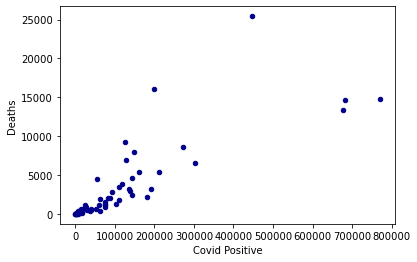

In [55]:
import scipy.stats as sts

AllStates_df.plot.scatter(x='Covid Positive',
                      y='Deaths',
                      c='DarkBlue')

In [69]:



correlation = sts.pearsonr(covid19_infxn, covid_deaths)

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is 0.82
The p-value is 1.321198837853699e-14


In [70]:
from scipy.stats import linregress
from sklearn import datasets



# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(covid19_infxn, covid_deaths)

# Calculate the predictions for each value of x (# Rooms)
regression_values = covid19_infxn * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


The r-squared is: 0.6698845012794258


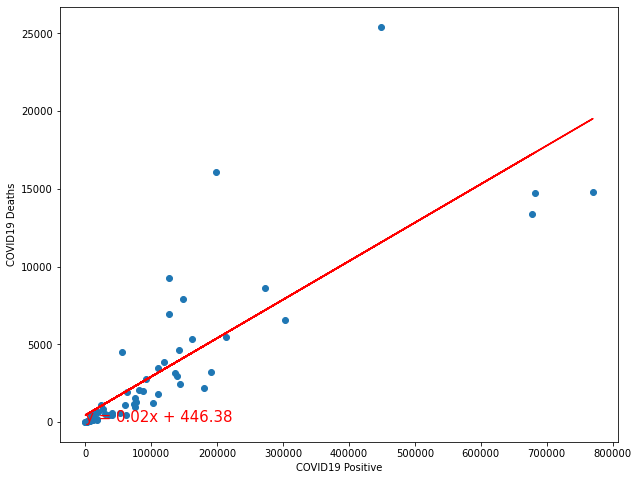

In [71]:
plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(covid19_infxn, covid_deaths)

# Plot the regression line
plt.plot(covid19_infxn, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
plt.xlabel('COVID19 Positive')
plt.ylabel('COVID19 Deaths')
print(f"The r-squared is: {rvalue**2}")
plt.show()

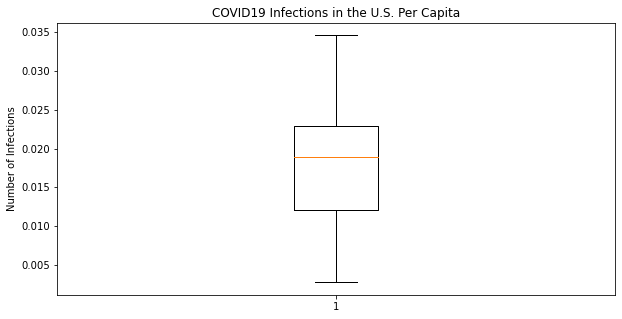

In [59]:
covid19_infxn_capita = AllState_combined_clean['Covid Positive Per Capita']

plt.figure(figsize=(10,5))
plt.title('COVID19 Infections in the U.S. Per Capita')
plt.ylabel('Number of Infections')
plt.boxplot(covid19_infxn_capita)
plt.show()


In [72]:
quartiles = covid19_infxn_capita.quantile([.25,.5,.75])

Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
iqr = Q3 - Q1

print(f"The lower quartile of COVID19 Infections per Capita is: {Q1}")
print(f"The upper quartile of COVID19 Infections per Capita is: {Q3}")
print(f"The interquartile range of COVID19 Infections per Capita is: {iqr}")
print(f"The the median of COVID19 Infections per Capita is: {quartiles[0.5]} ")

lower_bound = Q1 - (1.5*iqr)
upper_bound = Q3 + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = AllState_combined_clean.loc[(AllState_combined_clean['Covid Positive Per Capita'] < lower_bound) | (AllState_combined_clean['Covid Positive Per Capita'] > upper_bound)]
outliers

The lower quartile of COVID19 Infections per Capita is: 0.012115595530251124
The upper quartile of COVID19 Infections per Capita is: 0.02285524848073814
The interquartile range of COVID19 Infections per Capita is: 0.010739652950487014
The the median of COVID19 Infections per Capita is: 0.018920211263194583 
Values below -0.003993883895479399 could be outliers.
Values above 0.03896472790646866 could be outliers.


,States,FIPS,Date,Covid Positive,Deaths,State Pop,Covid Positive Per Capita,Covid Deaths Per Capita,NAME


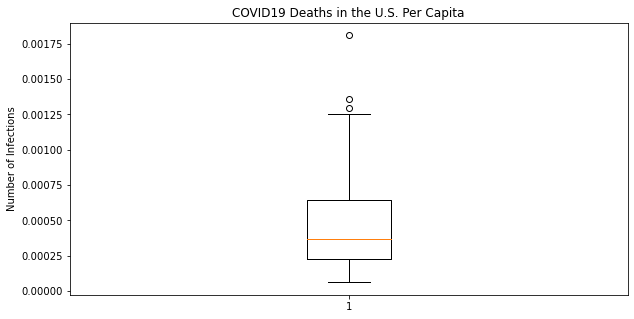

In [66]:
covid19_deaths_capita = AllState_combined_clean['Covid Deaths Per Capita']

plt.figure(figsize=(10,5))
plt.title('COVID19 Deaths in the U.S. Per Capita')
plt.ylabel('Number of Infections')
plt.boxplot(covid19_deaths_capita)
plt.show()


In [67]:
quartiles = covid19_deaths_capita.quantile([.25,.5,.75])

Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
iqr = Q3 - Q1

print(f"The lower quartile of COVID19 Deaths per Capita is: {Q1}")
print(f"The upper quartile of COVID19 Deaths per Capita is: {Q3}")
print(f"The interquartile range of COVID19 Deaths per Capita is: {iqr}")
print(f"The the median of COVID19 Deaths per capita is: {quartiles[0.5]} ")

lower_bound = Q1 - (1.5*iqr)
upper_bound = Q3 + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = AllState_combined_clean.loc[(AllState_combined_clean['Covid Deaths Per Capita'] < lower_bound) | (AllState_combined_clean['Covid Deaths Per Capita'] > upper_bound)]
outliers

The lower quartile of COVID19 Deaths is: 0.0002257252407012086
The upper quartile of COVID19 Deaths is: 0.0006458265535963371
The interquartile range of COVID19 Deaths is: 0.0004201013128951285
The the median of COVID19 Deaths is: 0.00037027503104411686 
Values below -0.0004044267286414841 could be outliers.
Values above 0.0012759785229390298 could be outliers.


,States,FIPS,Date,Covid Positive,Deaths,State Pop,Covid Positive Per Capita,Covid Deaths Per Capita,NAME
21,MA,25,20200918,126582,9269,6830193.0,0.018533,0.001357,Massachusetts
34,NJ,34,20200918,198848,16061,8881845.0,0.022388,0.001808,New Jersey
37,NY,36,20200918,448052,25423,19618453.0,0.022838,0.001296,New York


The correlation coefficient (r) is 0.48
The p-value is 0.0002768824184790108
The r-squared is: 0.23433470633704234


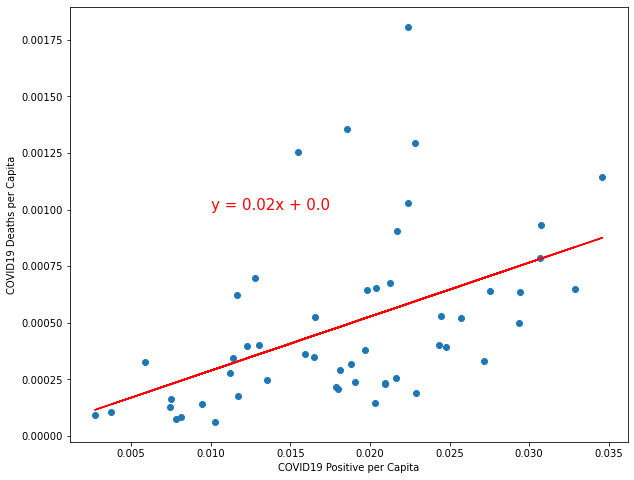

In [78]:
correlation = sts.pearsonr(covid19_infxn_capita, covid19_deaths_capita)

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(covid19_infxn_capita, covid19_deaths_capita)

# Calculate the predictions for each value of x (# Rooms)
regression_values = covid19_infxn_capita * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(covid19_infxn_capita, covid19_deaths_capita)

# Plot the regression line
plt.plot(covid19_infxn_capita, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (.010, .001), fontsize=15, color="red")
plt.xlabel('COVID19 Positive per Capita')
plt.ylabel('COVID19 Deaths per Capita')
print(f"The r-squared is: {rvalue**2}")
plt.show()